In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())

In [7]:
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

In [8]:
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].median())

In [9]:
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())

In [10]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

<Axes: >

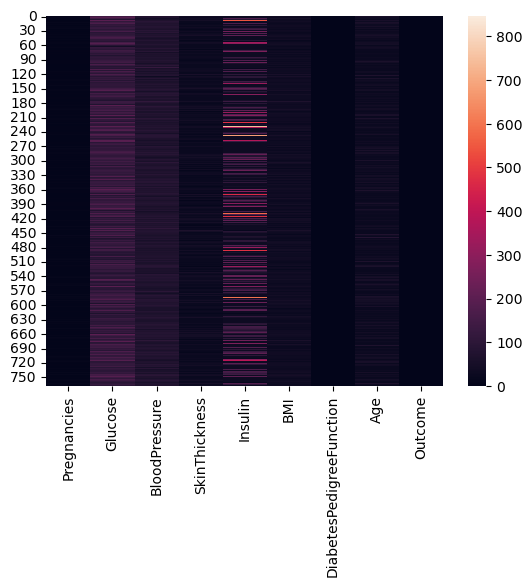

In [11]:
sns.heatmap(data)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [13]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [15]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [16]:
logi_model = LogisticRegression(random_state=101,max_iter=1000)

In [17]:
logi_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=101)

In [18]:
y_pred_logi = logi_model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
accuracy_logi = accuracy_score(y_test,y_pred_logi)

In [21]:
accuracy_logi

0.7857142857142857

In [22]:
matrix_logi = confusion_matrix(y_test,y_pred_logi)

In [23]:
matrix_logi

array([[89, 14],
       [19, 32]], dtype=int64)

In [24]:
report_logi = classification_report(y_test,y_pred_logi)

In [25]:
print(report_logi)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.70      0.63      0.66        51

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [27]:
tree_model = DecisionTreeClassifier(random_state=101)

In [28]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [29]:
y_pred_tree = tree_model.predict(X_test)

In [30]:
accuracy_tree = accuracy_score(y_test,y_pred_tree)
print(accuracy_tree)

0.7272727272727273


In [31]:
matrix_tree = confusion_matrix(y_test,y_pred_tree)

In [32]:
matrix_tree

array([[82, 21],
       [21, 30]], dtype=int64)

In [33]:
report_tree = classification_report(y_test, y_pred_tree)

In [34]:
print(report_tree)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       103
           1       0.59      0.59      0.59        51

    accuracy                           0.73       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



In [35]:
from sklearn.svm import SVC

In [36]:
svm_model = SVC(kernel='linear', random_state=101)

In [37]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=101)

In [38]:
y_pred_svm =svm_model.predict(X_test)

In [39]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
accuracy_svm

0.7792207792207793

In [40]:
matrix_svm = confusion_matrix(y_test,y_pred_svm)

In [41]:
matrix_svm

array([[90, 13],
       [21, 30]], dtype=int64)

In [42]:
report_svm = classification_report(y_test,y_pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       103
           1       0.70      0.59      0.64        51

    accuracy                           0.78       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



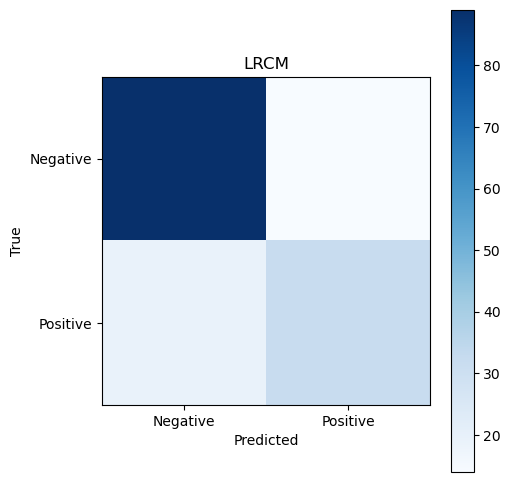

In [43]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(matrix_logi,interpolation='nearest',cmap=plt.cm.Blues)
tick_marks = np.arange(2)
plt.xticks(tick_marks,['Negative','Positive'])
plt.yticks(tick_marks,['Negative','Positive'])
plt.title('LRCM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()

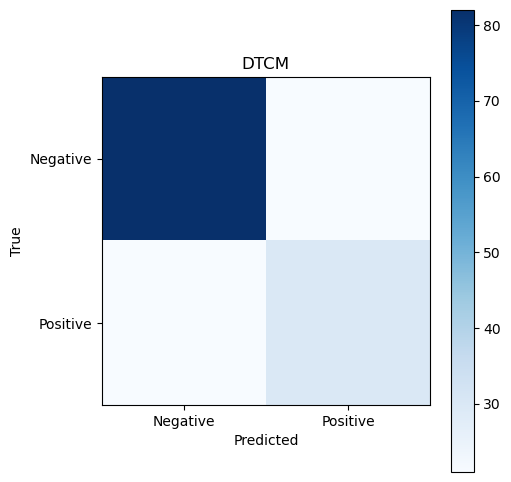

In [44]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,2)
plt.imshow(matrix_tree,interpolation='nearest',cmap=plt.cm.Blues)
plt.xticks(tick_marks,['Negative','Positive'])
plt.yticks(tick_marks,['Negative','Positive'])
plt.title('DTCM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()

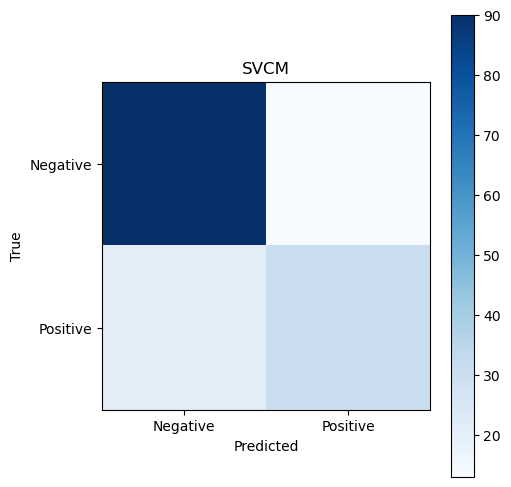

In [45]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,3)
plt.imshow(matrix_svm,interpolation='nearest',cmap=plt.cm.Blues)
plt.xticks(tick_marks,['Negative','Positive'])
plt.yticks(tick_marks,['Negative','Positive'])
plt.title('SVCM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()

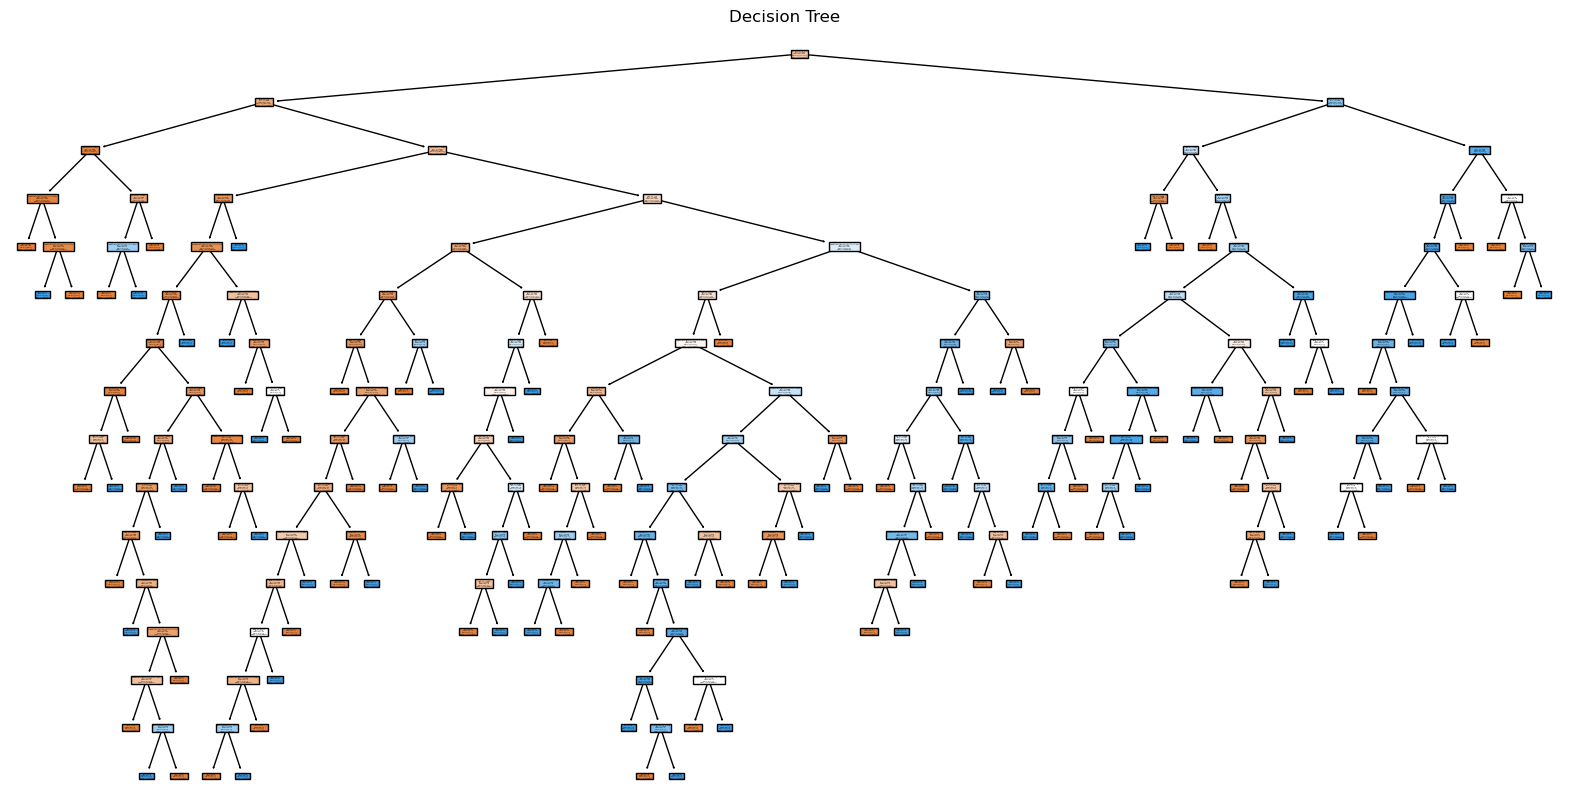

In [46]:
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=data.columns[:-1], class_names=['No Diabetes', 'Diabetes'])
plt.title('Decision Tree')
plt.savefig("TheTree.pdf")
plt.show()

In [47]:
importances = tree_model.feature_importances_

In [48]:
indices = np.argsort(importances)[::-1]

In [49]:
for f in range(X.shape[1]):
    print(f"{f+1}.feature{data.columns[indices[f]]}({importances[indices[f]]})")

1.featureGlucose(0.28181458388252717)
2.featureBMI(0.15858099757145186)
3.featureAge(0.15029606356973008)
4.featureDiabetesPedigreeFunction(0.13936167312359474)
5.featureBloodPressure(0.08374670273476001)
6.featureInsulin(0.07562363200685351)
7.featurePregnancies(0.0637515225519859)
8.featureSkinThickness(0.04682482455909666)


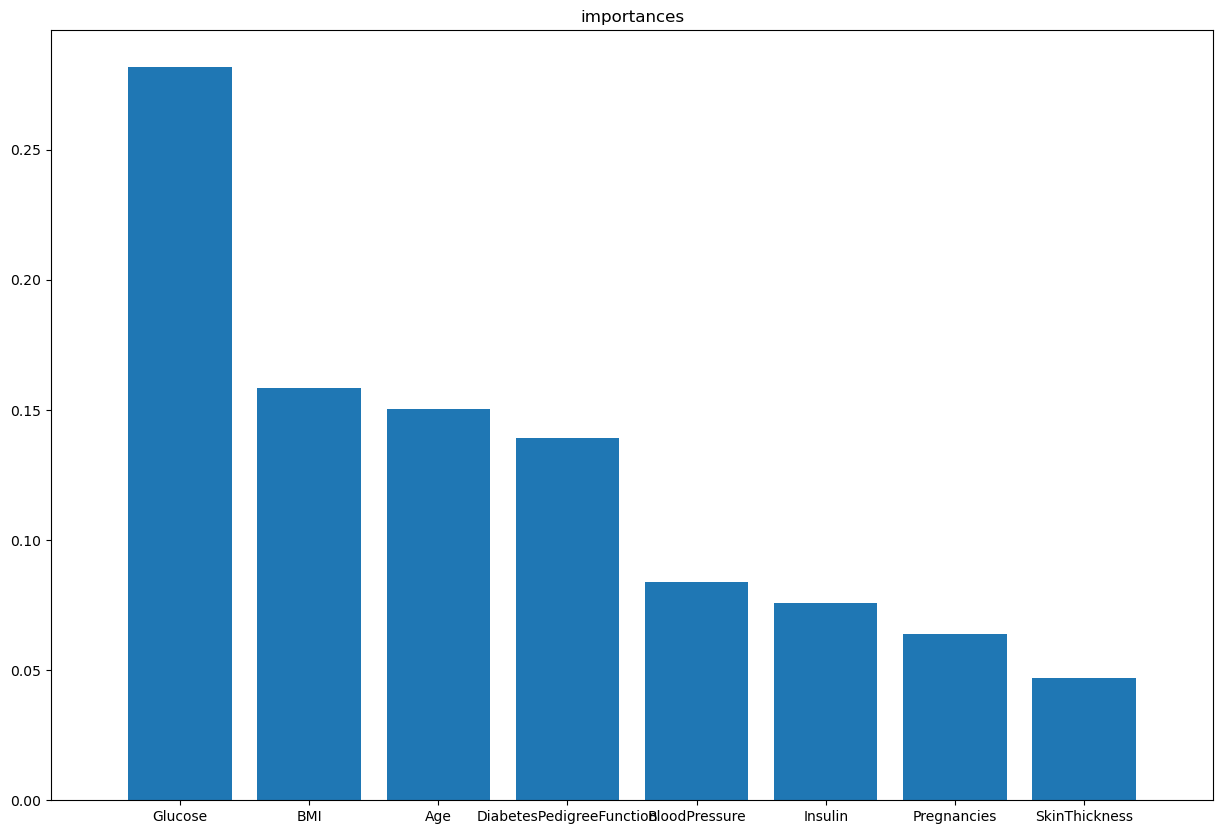

In [50]:
plt.figure(figsize=(15,10))
plt.title("importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]),[data.columns[i] for i in indices])
plt.xlim([-1,X.shape[1]])
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
cv_logi = cross_val_score(logi_model,X,y,cv=5)

In [53]:
print(cv_logi)

[0.74675325 0.73376623 0.77272727 0.79738562 0.77777778]


In [54]:
print(np.mean(cv_logi))

0.7656820303879126


In [55]:
cv_tree = cross_val_score(tree_model,X,y,cv=5)

In [56]:
print(cv_tree)

[0.67532468 0.64285714 0.68181818 0.75816993 0.7254902 ]


In [57]:
print(np.mean(cv_tree))

0.6967320261437908


In [58]:
cv_svm = cross_val_score(svm_model,X,y,cv=5)

In [59]:
print(cv_svm)

[0.75974026 0.74025974 0.77922078 0.80392157 0.77124183]


In [60]:
print(np.mean(cv_svm))

0.7708768355827178


In [61]:
main_features = indices[:4]

In [62]:
main_names = [data.columns[i] for i in main_features]

In [63]:
main_names

['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']

In [64]:
X_newtrain = X_train[:,main_features]
X_newtest = X_test[:,main_features]

In [65]:
newtree_model = DecisionTreeClassifier(random_state=101)
newtree_model.fit(X_newtrain,y_train)

DecisionTreeClassifier(random_state=101)

In [66]:
y_pred_newtree = newtree_model.predict(X_newtest)

In [67]:
accuracy_newtree = accuracy_score(y_test,y_pred_newtree)
print(accuracy_newtree)

0.7207792207792207


In [68]:
matrix_newtree = confusion_matrix(y_test,y_pred_newtree)
matrix_newtree

array([[80, 23],
       [20, 31]], dtype=int64)

In [69]:
report_newtree = classification_report(y_test, y_pred_newtree)
print(report_newtree)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       103
           1       0.57      0.61      0.59        51

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.73      0.72      0.72       154



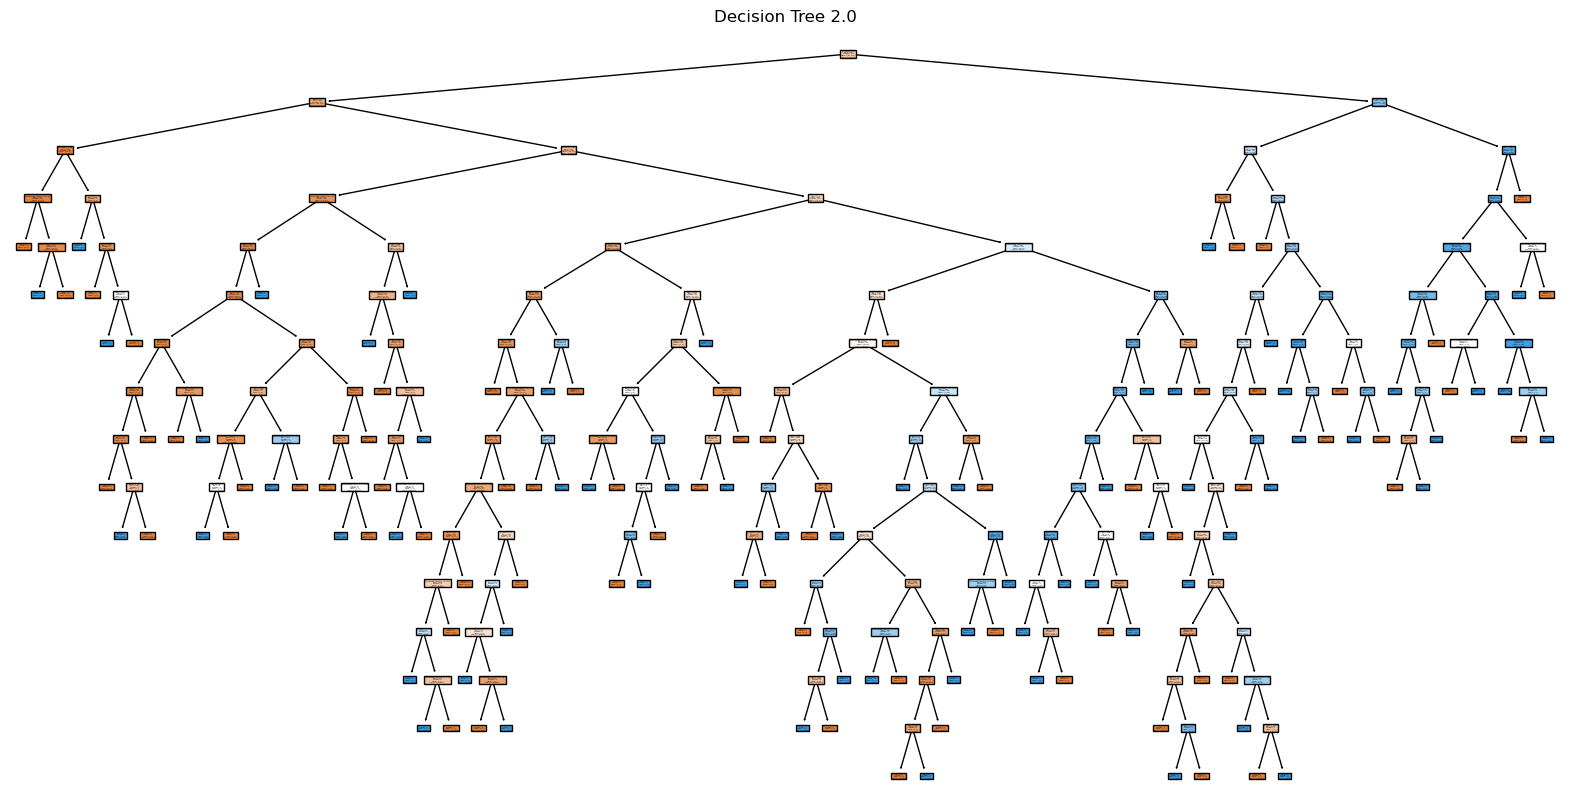

In [70]:
plt.figure(figsize=(20,10))
plot_tree(newtree_model, filled=True, feature_names=main_names, class_names=['No Diabetes', 'Diabetes'])
plt.title('Decision Tree 2.0')
plt.savefig("TheNewTree.pdf")
plt.show()

In [71]:
newlogi_model = LogisticRegression(random_state=101,max_iter=1000)
newlogi_model.fit(X_newtrain,y_train)

LogisticRegression(max_iter=1000, random_state=101)

In [72]:
y_pred_newlogi = newlogi_model.predict(X_newtest)

In [82]:
accuracy_newlogi = accuracy_score(y_test,y_pred_newlogi)
print(accuracy_newlogi)

0.7987012987012987


In [74]:
matrix_newlogi = confusion_matrix(y_test,y_pred_newlogi)
matrix_newlogi

array([[91, 12],
       [19, 32]], dtype=int64)

In [75]:
report_newlogi = classification_report(y_test, y_pred_newlogi)
print(report_newlogi)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       103
           1       0.73      0.63      0.67        51

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.76       154
weighted avg       0.79      0.80      0.79       154



In [76]:
newsvm_model = SVC(kernel='poly', random_state=101)

In [77]:
newsvm_model.fit(X_newtrain,y_train)

SVC(kernel='poly', random_state=101)

In [78]:
y_pred_newsvm = newsvm_model.predict(X_newtest)

In [79]:
accuracy_newsvm = accuracy_score(y_test,y_pred_newsvm)
print(accuracy_newsvm)

0.7402597402597403


In [80]:
matrix_newsvm = confusion_matrix(y_test,y_pred_newsvm)
matrix_newsvm

array([[97,  6],
       [34, 17]], dtype=int64)

In [83]:
report_newsvm = classification_report(y_test, y_pred_newsvm)
print(report_newsvm)

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       103
           1       0.74      0.33      0.46        51

    accuracy                           0.74       154
   macro avg       0.74      0.64      0.64       154
weighted avg       0.74      0.74      0.71       154

